### Linear Regression

In [13]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(4)
from sklearn import datasets, linear_model

N = 30
N_test = 20
X = np.random.rand(N, 1)*5
y = 3*(X-2)*(X-3)*(X-4)+ 10*np.random.randn(N, 1)

X_test = (np.random.rand(N_test, 1)-1/8)*10
y_test = 3*(X_test-2)*(X_test-3)*(X_test-4)+ 10*np.random.randn(N_test, 1)

(20, 1) (20, 1)


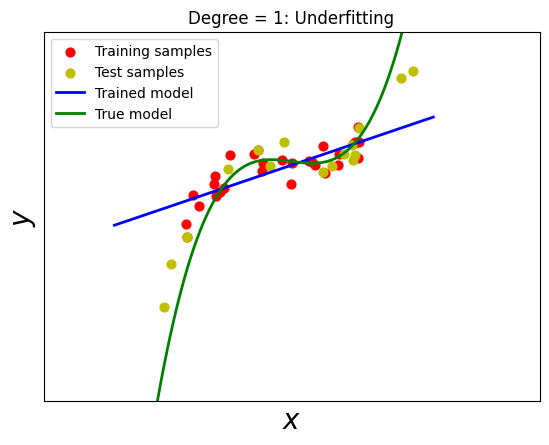

[[-41.90206792  12.66196586]]
(20, 1) (20, 1)


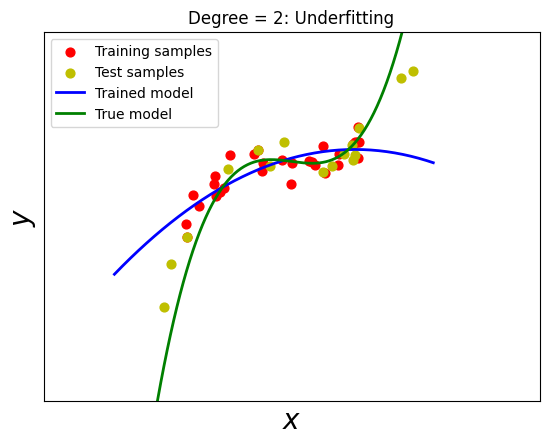

[[-52.79321911  27.33320281  -2.85491906]]
(20, 1) (20, 1)


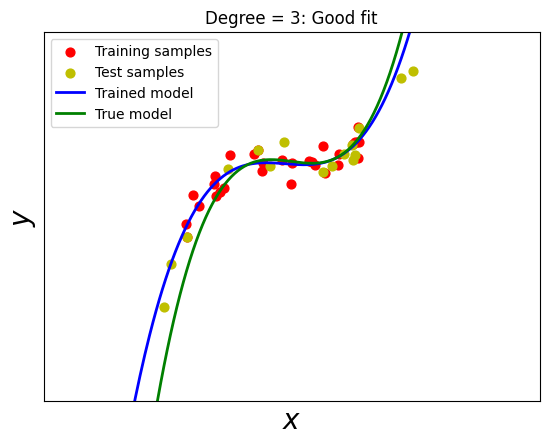

[[-70.86022078  78.7687132  -28.99387406   3.4286372 ]]
(20, 1) (20, 1)


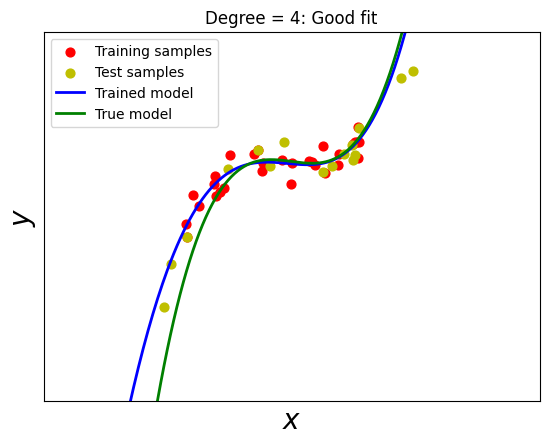

[[-70.11099235  74.66197229 -24.91080481   2.11241837   0.13285956]]
(20, 1) (20, 1)


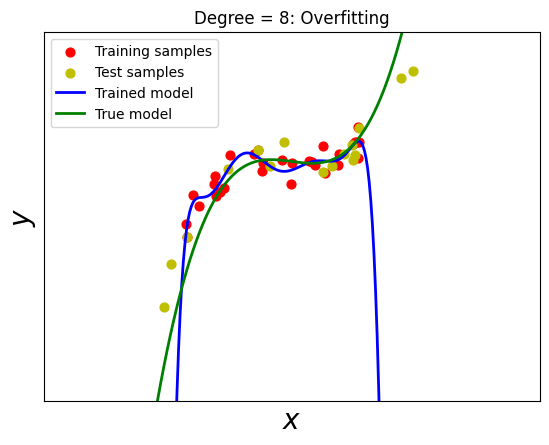

[[-8.31452004e+01  3.47714187e+02 -1.03309551e+03  1.48372383e+03
  -1.08580923e+03  4.36091506e+02 -9.77083149e+01  1.14715264e+01
  -5.50276444e-01]]
(20, 1) (20, 1)


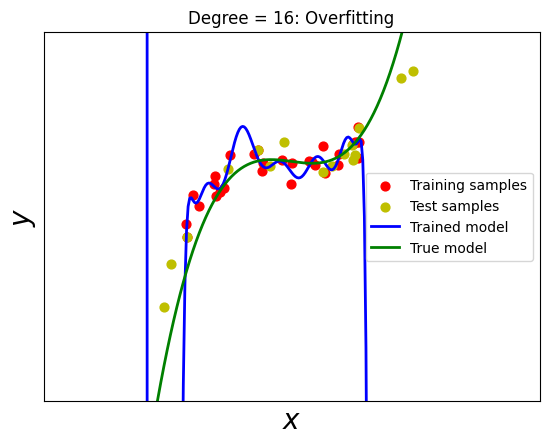

[[-1.13968577e+02  1.48506298e+03 -1.06958003e+04  3.60285365e+04
  -6.18724070e+04  5.04148917e+04 -1.05503678e+03 -3.90914830e+04
   4.21718380e+04 -2.45080853e+04  9.16605631e+03 -2.30832421e+03
   3.91246582e+02 -4.30281223e+01  2.80033211e+00 -8.49684822e-02
   3.06587838e-04]]


In [14]:
def buildX(X, d = 2):
    res = np.ones((X.shape[0], 1))
    for i in range(1, d+1):
        res = np.concatenate((res, X**i), axis = 1)
    return res 

def myfit(X, y, d):
    Xbar = buildX(X, d)
    regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
    regr.fit(Xbar, y)

    w = regr.coef_
    # Display result
    w_0 = w[0][0]
    w_1 = w[0][1]
    x0 = np.linspace(-2, 7, 200, endpoint=True)
    y0 = np.zeros_like(x0)
    ytrue = 5*(x0 - 2)*(x0-3)*(x0-4)
    for i in range(d+1):
        y0 += w[0][i]*x0**i

    # Draw the fitting line 
    plt.scatter(X.T, y.T, c = 'r', s = 40, label = 'Training samples')     # data 
    print(X_test.shape, y_test.shape)
    plt.scatter(X_test.T, y_test.T, c = 'y', s = 40, label = 'Test samples')     # data 
    
    plt.plot(x0, y0, 'b', linewidth = 2, label = "Trained model")   # the fitting line
    plt.plot(x0, ytrue, 'g', linewidth = 2, label = "True model")   # the fitting line
    plt.xticks([], [])
    plt.yticks([], [])
    if d < 3:
        str1 = 'Underfitting'
    elif d > 4:
        str1 = 'Overfitting'
    else:
        str1 = 'Good fit'
    str0 = 'Degree = ' + str(d) + ': ' + str1
    plt.title(str0)
    plt.axis([-4, 10, np.amin(y_test) - 100, np.amax(y) + 100])
    plt.legend(loc="best")
    
    fn = 'linreg_' + str(d) + '.png'
    
    plt.xlabel('$x$', fontsize = 20);
    plt.ylabel('$y$', fontsize = 20);
    
    plt.savefig(fn, bbox_inches='tight', dpi = 600)
    
    plt.show()
    print(w)

myfit(X, y, 1)
myfit(X, y, 2)
myfit(X, y, 3)
myfit(X, y, 4)
myfit(X, y, 8)
myfit(X, y, 16)

49


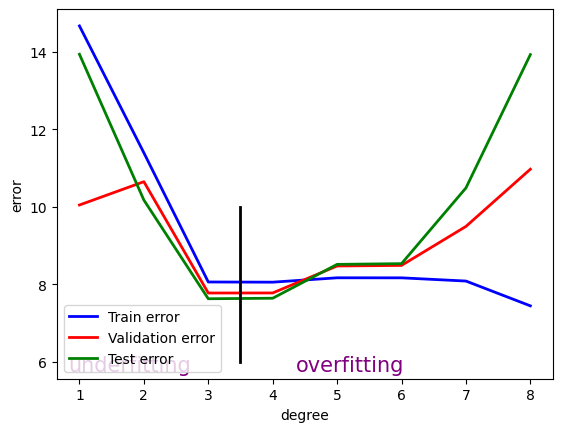

In [20]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(5)
from sklearn import datasets, linear_model

N = 50
N_test = 10 
X = np.random.rand(N, 1)*5
y = 3*(X -2) * (X - 3)*(X-4) +  10*np.random.randn(N, 1)

# split train to train + valid use train_test_split 
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split( \
     X, y, test_size=0.33, random_state=0)

# generate test data
X_test = (np.random.rand(N_test,1)) *5
y_test = 3*(X_test -2) * (X_test - 3)*(X_test-4) +  10*np.random.randn(N_test, 1)

def buildX(X, d = 2):
    res = np.ones((X.shape[0], 1))
    for i in range(1, d+1):
        res = np.concatenate((res, X**i), axis = 1)
    return res 

def poly(a, x):
    """
    return a[0] + a[1]*x + a[2]*x**2 + .... 
    """
    res = np.zeros_like(x)
    for i in range(len(a) - 1, -1, -1):
        res = res*x + a[i] 
    return res 

x = 2
a = [1, 2, 3, 4]
print(poly(a, x))

def MSE(x, y, w):     
    d = len(w) - 1
    y_pred = poly(w, x)
    return np.mean(np.abs(y - y_pred))

def myfit(d):
    Xbar = buildX(X_train, d)
    regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
    regr.fit(Xbar, y_train)

    w = regr.coef_[0]
    train_err = MSE(X_train, y_train, w)
    valid_err = MSE(X_valid, y_valid, w)
    test_err = MSE(X_test, y_test, w)
                    
    return (train_err, valid_err, test_err)
    
    
Train_error = []
Test_error = []
Valid_error = []
degree = 9
for d in range(1, degree):
    (train_err, valid_err, test_err) = myfit(d) 
    Train_error.append(train_err)
    Test_error.append(test_err)
    Valid_error.append(valid_err)

degree = range(1, degree)

fig = plt.figure()
# fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)

plt.plot(degree, Train_error, 'b-', linewidth = 2, label = "Train error")
plt.plot(degree, Valid_error, 'r-', linewidth = 2, label = "Validation error")
plt.plot(degree, Test_error, 'g-', linewidth = 2, label = "Test error")
plt.legend(loc="best")
plt.xlabel('degree')
plt.ylabel('error')


plt.plot([3.5, 3.5], [6, 10], color='k', linestyle='-', linewidth=2)
ax.text(0.7, 0.01, 'overfitting',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='purple', fontsize=15)
ax.text(0.27, 0.01, 'underfitting',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='purple', fontsize=15)
plt.savefig('linreg_val.png', bbox_inches='tight', dpi = 600)
plt.show()